<a href="https://colab.research.google.com/github/ishwarvenugopal/CE888_Data_Science_and_Decision_Making/blob/master/Lab_7/AlienVsPredator_CNN_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Getting the data from Kaggle

In [19]:
import os
os.environ['KAGGLE_USERNAME'] = "ishwarvenugopal06" # username from the json file
os.environ['KAGGLE_KEY'] = "641c8e34b4f53442ba7b4eaf9b09b7ee" # key from the json file
!kaggle datasets download -d pmigdal/alien-vs-predator-images

alien-vs-predator-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [20]:
# Upload data
from zipfile import ZipFile

file_name = "/content/alien-vs-predator-images.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


### Convolutional Neural Network model

In [24]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
train_dir="/content/data/train"
validation_dir="/content/data/validation"

### Decoding the pictures into grid of pixels with proper rescaling

In [27]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


### Training the model

In [28]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

Epoch 1/30
100/100 [==============================] - 4s 38ms/step - loss: 0.6334 - acc: 0.6313 - val_loss: 0.5980 - val_acc: 0.6150
Epoch 2/30
100/100 [==============================] - 3s 30ms/step - loss: 0.5525 - acc: 0.7255 - val_loss: 0.5691 - val_acc: 0.7000
Epoch 3/30
100/100 [==============================] - 3s 30ms/step - loss: 0.4651 - acc: 0.7821 - val_loss: 0.5681 - val_acc: 0.6800
Epoch 4/30
100/100 [==============================] - 3s 31ms/step - loss: 0.4008 - acc: 0.8251 - val_loss: 0.5113 - val_acc: 0.7450
Epoch 5/30
100/100 [==============================] - 3s 31ms/step - loss: 0.3378 - acc: 0.8588 - val_loss: 0.5484 - val_acc: 0.7150
Epoch 6/30
100/100 [==============================] - 3s 32ms/step - loss: 0.2840 - acc: 0.8934 - val_loss: 0.5721 - val_acc: 0.7100
Epoch 7/30
100/100 [==============================] - 3s 33ms/step - loss: 0.2301 - acc: 0.9103 - val_loss: 0.5719 - val_acc: 0.7500
Epoch 8/30
100/100 [==============================] - 3s 30ms/step - 

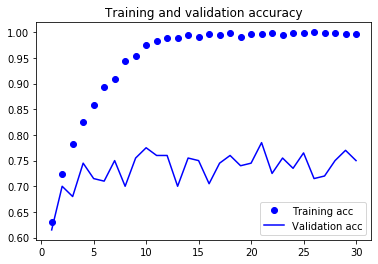

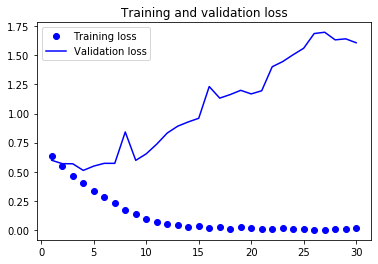

In [29]:
model.save('aliensVsPredators_1.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Convolution Layer with Dropout

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 21s 208ms/step - loss: 0.6365 - acc: 0.6297 - val_loss: 0.6205 - val_acc: 0.6041
Epoch 2/20
100/100 [==============================] - 19s 189ms/step - loss: 0.5773 - acc: 0.6955 - val_loss: 0.6736 - val_acc: 0.6110
Epoch 3/20
100/100 [==============================] - 19s 185ms/step - loss: 0.5497 - acc: 0.7217 - val_loss: 0.5936 - val_acc: 0.6292
Epoch 4/20
100/100 [==============================] - 19s 190ms/step - loss: 0.5352 - acc: 0.7316 - val_loss: 0.6080 - val_acc: 0.6613
Epoch 5/20
100/100 [==============================] - 19s 186ms/step - loss: 0.5168 - acc: 0.7482 - val_loss: 0.5292 - val_acc: 0.7200
Epoch 6/20
100/100 [==============================] - 20s 197ms/step - loss: 0.5017 - acc: 0.7541 - val_loss: 0.5941 - val_acc: 0.6711
Epoch 7/20
100/100 [==============================] - 18s 184ms/step - loss: 0.4903 - acc: 0.7580 - val_loss

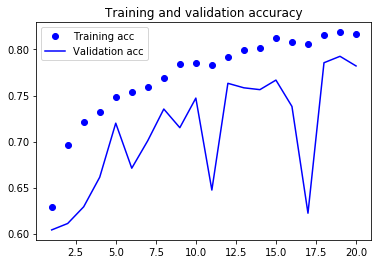

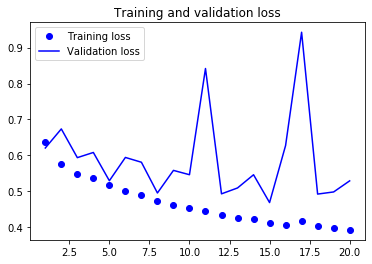

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()